In [1]:
import pandas as pd
import numpy as np

In [2]:
#!pip install bagofwords

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
test_data = pd.read_csv('test_clean.csv')
train_data = pd.read_csv('train_clean.csv')
print(test_data)

          category                                               text
0       BACKGROUND  Many pathogenic processes and diseases are the...
1       BACKGROUND  It was recently demonstrated that supraphysiol...
2       BACKGROUND  In the present study , we examined the associa...
3       BACKGROUND  In addition , we compared plasma levels of MAp...
4          METHODS  A total of 192 MI patients and 140 control per...
...            ...                                                ...
29257      RESULTS  Bone loss at the median forearm site was signi...
29258      RESULTS  Breast tenderness occurred in 47 percent of th...
29259      RESULTS  Vaginal bleeding occurred at some time in 52 p...
29260  CONCLUSIONS  In postmenopausal women with low bone density ...
29261  CONCLUSIONS  Although the exercise-estrogen regimen was mor...

[29262 rows x 2 columns]


In [5]:
pd.unique(train_data['category'])

array(['BACKGROUND', 'METHODS', 'CONCLUSIONS', 'RESULTS', 'OBJECTIVE'],
      dtype=object)

In [6]:
CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')


In [7]:
sentence_1_list = (train_data['text']).tolist()
sentence_2_list = (test_data['text']).tolist()

In [8]:
sentence_1 =' '.join(map(str, sentence_1_list))
sentence_2 =' '.join(map(str, sentence_2_list))

In [9]:
#sentence_2

In [10]:
#transform
Count_data = CountVec.fit_transform([sentence_1, sentence_2])
 


In [11]:
#create dataframe
bow_df =pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(bow_df)

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


     00   000  0000  00000  00000000001  00000001  00000003  00000005  \
0  6388  8013    90      1            1         1         2         2   
1   108    78     2      0            0         0         0         0   

   000000072  0000001  ...  zytf  zytm  zytram  zyw  zywave  zyxzm  zz  zzd  \
0          1        8  ...     3     5       1    7       6      2   6    4   
1          0        0  ...     0     0       0    0       0      0   0    0   

   zzkzc  zzp  
0      7    3  
1      0    0  

[2 rows x 179820 columns]


In [12]:
display(bow_df)

,00,000,0000,00000,00000000001,00000001,00000003,00000005,000000072,0000001,...,zytf,zytm,zytram,zyw,zywave,zyxzm,zz,zzd,zzkzc,zzp
0,6388,8013,90,1,1,1,2,2,1,8,...,3,5,1,7,6,2,6,4,7,3
1,108,78,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
bow_df = bow_df.T

In [14]:
display(bow_df)

,0,1
00,6388,108
000,8013,78
0000,90,2
00000,1,0
00000000001,1,0
...,...,...
zyxzm,2,0
zz,6,0
zzd,4,0
zzkzc,7,0


In [15]:
bow_df.sort_values(0, ascending = False)

,0,1
patients,524404,7092
group,427119,5619
treatment,247588,3157
study,232757,3287
groups,169449,2253
...,...,...
nct01005498,0,1
linctus,0,1
photoeruptions,0,1
ballots,0,1


In [16]:
bow_df = bow_df.sort_values(1, ascending = False)

In [17]:
bow_df[0].head(20)

patients         524404
group            427119
study            232757
treatment        247588
groups           169449
mg               146321
placebo          139953
randomized       138327
significant      130407
compared         125635
significantly    128153
control          114286
trial            104029
months           103265
clinical          92461
mean              91260
12                95594
baseline          82827
10                90712
years             74337
Name: 0, dtype: int64

In [18]:
bow_df[1].head(20)

patients         7092
group            5619
study            3287
treatment        3157
groups           2253
mg               2008
placebo          1960
randomized       1820
significant      1706
compared         1655
significantly    1647
control          1479
trial            1443
months           1418
clinical         1278
mean             1244
12               1175
baseline         1174
10               1171
years            1139
Name: 1, dtype: int64

In [19]:
# this is the complete bow for test and train
# the real comparisons we want to see are between the subgroups 
# using the train data, I will now separate the data by category and sort by bow again


methods = train_data.loc[train_data['category'] == 'METHODS']
background = train_data.loc[train_data['category'] == 'BACKGROUND']
results = train_data.loc[train_data['category'] == 'RESULTS']
objective = train_data.loc[train_data['category'] == 'OBJECTIVE']
conclusions = train_data.loc[train_data['category'] == 'CONCLUSIONS']


In [20]:
group_1_list = (methods['text']).tolist()
group_2_list = (background['text']).tolist()
group_3_list = (results['text']).tolist()
group_4_list = (objective['text']).tolist()
group_5_list = (conclusions['text']).tolist()

In [21]:
group_m =' '.join(map(str, group_1_list))
group_b =' '.join(map(str, group_2_list))
group_r =' '.join(map(str, group_3_list))
group_o =' '.join(map(str, group_4_list))
group_c =' '.join(map(str, group_5_list))


In [22]:
Count_data_groups = CountVec.fit_transform([group_b, group_o, group_m, group_r, group_c])

In [23]:
cat_bow =pd.DataFrame(Count_data_groups.toarray(),columns=CountVec.get_feature_names())
print(cat_bow)

C:\Users\nicol\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


     00   000  0000  00000  00000000001  00000001  00000003  00000005  \
0    20   264     0      0            0         0         0         0   
1    72   247     0      0            0         0         0         0   
2  1538  3314     4      0            0         0         0         0   
3  4670  3666    86      1            1         1         2         2   
4    88   522     0      0            0         0         0         0   

   000000072  0000001  ...  zytf  zytm  zytram  zyw  zywave  zyxzm  zz  zzd  \
0          0        0  ...     0     0       0    0       0      0   0    0   
1          0        0  ...     1     1       1    2       0      0   1    1   
2          0        0  ...     1     1       0    1       6      1   2    0   
3          1        8  ...     0     2       0    2       0      0   1    2   
4          0        0  ...     1     1       0    2       0      1   2    1   

   zzkzc  zzp  
0      0    0  
1      1    1  
2      4    1  
3      1    0  
4     

In [24]:
cat_bow = cat_bow.T

In [25]:
cat_bow = cat_bow.sort_values(1, ascending = False)

In [26]:
cat_bow.head(20)

,0,1,2,3,4
study,27408,43610,91204,39095,31440
patients,35916,42603,188110,186231,71544
treatment,21669,24665,73432,83210,44612
efficacy,10948,23339,12649,7867,10587
evaluate,5480,22648,4149,266,1521
effects,13136,21782,11249,18417,17890
compare,4592,21273,3321,258,399
effect,9672,19601,7048,20919,19573
determine,4661,18854,4096,336,2338
therapy,11267,13334,22122,18860,19639


In [27]:
#background
cat_bow = cat_bow.sort_values(0, ascending = False)
cat_bow[0].head(20)

patients      35916
study         27408
treatment     21669
effects       13136
clinical      12047
trial         11729
therapy       11267
efficacy      10948
risk          10526
disease       10206
studies        9992
effect         9672
randomized     8417
associated     8304
compared       7806
use            7608
cancer         7402
controlled     7346
used           7311
health         7065
Name: 0, dtype: int64

In [28]:
#objective
cat_bow = cat_bow.sort_values(1, ascending = False)
cat_bow[1].head(20)

study            43610
patients         42603
treatment        24665
efficacy         23339
evaluate         22648
effects          21782
compare          21273
effect           19601
determine        18854
therapy          13334
assess           12723
clinical         12516
safety           11876
investigate      11313
aim              10910
trial            10867
compared         10436
randomized        9677
effectiveness     8301
pain              8292
Name: 1, dtype: int64

In [29]:
#methods
cat_bow = cat_bow.sort_values(2, ascending = False)
cat_bow[2].head(20)

patients      188110
group         126469
randomized    103980
study          91204
mg             88373
treatment      73432
trial          60304
placebo        60071
randomly       50654
groups         49692
weeks          49658
received       47582
months         46746
controlled     45466
using          44250
control        43282
day            42905
12             41343
years          39016
10             38121
Name: 2, dtype: int64

In [30]:
#results
cat_bow = cat_bow.sort_values(3, ascending = False)
cat_bow[3].head(20)

group            283998
patients         186231
groups           112794
significantly    108500
significant      106663
treatment         83210
vs                82095
95                73946
mean              71274
compared          71247
placebo           65104
05                62655
ci                59129
respectively      57724
001               57393
difference        54748
control           53696
months            47168
12                47031
10                45478
Name: 3, dtype: int64

In [31]:
#conclusions
cat_bow = cat_bow.sort_values(4, ascending = False)
cat_bow[4].head(20)

patients         71544
treatment        44612
study            31440
effective        27710
results          24444
clinical         19747
therapy          19639
effect           19573
use              18209
effects          17890
associated       17877
risk             17743
significantly    17415
significant      17363
compared         16343
dose             15249
high             13353
did              13269
pain             12653
term             12470
Name: 4, dtype: int64

In [32]:
# next is the unsupervised continuous bag of words model
# cite : https://github.com/FraLotito/pytorch-continuous-bag-of-words/blob/master/cbow.py
import torch
import torch.nn as nn

In [33]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

In [34]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
EMDEDDING_DIM = 100

In [35]:
# make a smaller dataset to test on

train_data_sample = train_data.iloc[1:50]
sample_1_list = (train_data_sample['text']).tolist()
#sample_1 =' '.join(map(str, sample_1_list))
sentences = sample_1_list

In [36]:
for i, sentence in enumerate(sentences):
    #sentence = sentence.strip('.,();:')
    sentence = sentence.replace(',','')
    sentence = sentence.replace('.','')
    sentence = sentence.replace('(','')
    sentence = sentence.replace(')','')
    sentence = sentence.replace(';','')
    sentence = sentence.replace(':','')
    sentence = sentence.split()
    
    sentences[i] = sentence

In [37]:
#sentences
import itertools

regular_list = sentences
raw_text = list(itertools.chain(*regular_list))

In [38]:
#raw_text

In [39]:
# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

In [40]:
word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}

In [41]:
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))

In [42]:
class CBOW(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()

        #out: 1 x emdedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()
        
        #out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)
        self.activation_function2 = nn.LogSoftmax(dim = -1)
        

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        return self.embeddings(word).view(1,-1)

In [43]:
model = CBOW(vocab_size, EMDEDDING_DIM)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)



In [44]:

#TRAINING
for epoch in range(50):
    total_loss = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)  

        log_probs = model(context_vector)

        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

    #optimize at the end of each epoch
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

In [45]:
#TESTING
context = ['controlled', 'trial', 'study', 'designed'] # target = randomised
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)


In [46]:
#Print result
print(f'Raw text: {" ".join(raw_text)}\n')
print(f'Context: {context}\n')
print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')

Raw text: This paper describes the design and evaluation of Positive Outlook an online program aiming to enhance the self-management skills of gay men living with HIV This study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group The intervention group will participate in the online group program ` Positive Outlook ' The program is based on self-efficacy theory and uses a self-management approach to enhance skills confidence and abilities to manage the psychosocial issues associated with HIV in daily life Participants will access the program for a minimum of 90 minutes per week over seven weeks Primary outcomes are domain specific self-efficacy HIV related quality of life and outcomes of health education Secondary outcomes include depression anxiety and stress general health and quality of life adjustment to HIV and social support Data collection will take place at baseline c

In [47]:
from gensim.models import word2vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')
from gensim.models.word2vec import Word2Vec



import gensim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec

df = train_data_sample

In [48]:
from itertools import islice

In [49]:
#train_data_sample

In [50]:
sample_1_list = (train_data_sample['text']).tolist()
#print(sample_1_list)




sentences = sample_1_list


In [51]:
#sentences = sentences.strip()
#sentences

In [52]:
#sentences =' '.join(map(str, sentences))

for i, sentence in enumerate(sentences):
    #sentence = sentence.strip('.,();:')
    sentence = sentence.replace(',','')
    sentence = sentence.replace('.','')
    sentence = sentence.replace('(','')
    sentence = sentence.replace(')','')
    sentence = sentence.replace(';','')
    sentence = sentence.replace(':','')
    sentence = sentence.split()
    
    sentences[i] = sentence
    
#sentences = sentences.split()
#sentences

In [53]:
#sentences

In [54]:
w2v = Word2Vec(sentences, min_count=1, vector_size = 5)

print(w2v)

Word2Vec(vocab=441, vector_size=5, alpha=0.025)


In [55]:
# Loop through the first 10 words - you can probably guess that they are listed by frequencies.
for index, word in enumerate(w2v.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v.wv.index_to_key)} is {word}")

word #0/441 is the
word #1/441 is and
word #2/441 is in
word #3/441 is of
word #4/441 is group
word #5/441 is to
word #6/441 is The
word #7/441 is with
word #8/441 is was
word #9/441 is groups


In [56]:
# Chuck in some words
w2v.wv["randomised"]

array([-0.16594349,  0.01677216,  0.0646208 ,  0.1261826 , -0.05448373],
      dtype=float32)

In [57]:
w2v.wv.most_similar("randomised") # Note this is slow to run if your corpus is very large.

[('detected', 0.9705499410629272),
 ('completion', 0.9463170170783997),
 ('formulations', 0.9320744872093201),
 ('assigned', 0.9223210215568542),
 ('BID', 0.882068395614624),
 ('Participants', 0.8669648766517639),
 ('well', 0.8648950457572937),
 ('controlled', 0.861993670463562),
 ('included', 0.8425852656364441),
 ('steroid', 0.8127044439315796)]

In [58]:
model = w2v
# Original codes - take 'model' as input, not word vectors
def tsne_plot(model, no_words=100):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for i, word in enumerate(model.wv.index_to_key):
        tokens.append(model.wv[word])
        labels.append(word)
        if i == no_words:
            break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [59]:
# Take word vectors as input
def tsne_plot(model_wv, no_words=100):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for i, word in enumerate(model_wv.index_to_key):
        tokens.append(model_wv[word])
        labels.append(word)
        if i == no_words:
            break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

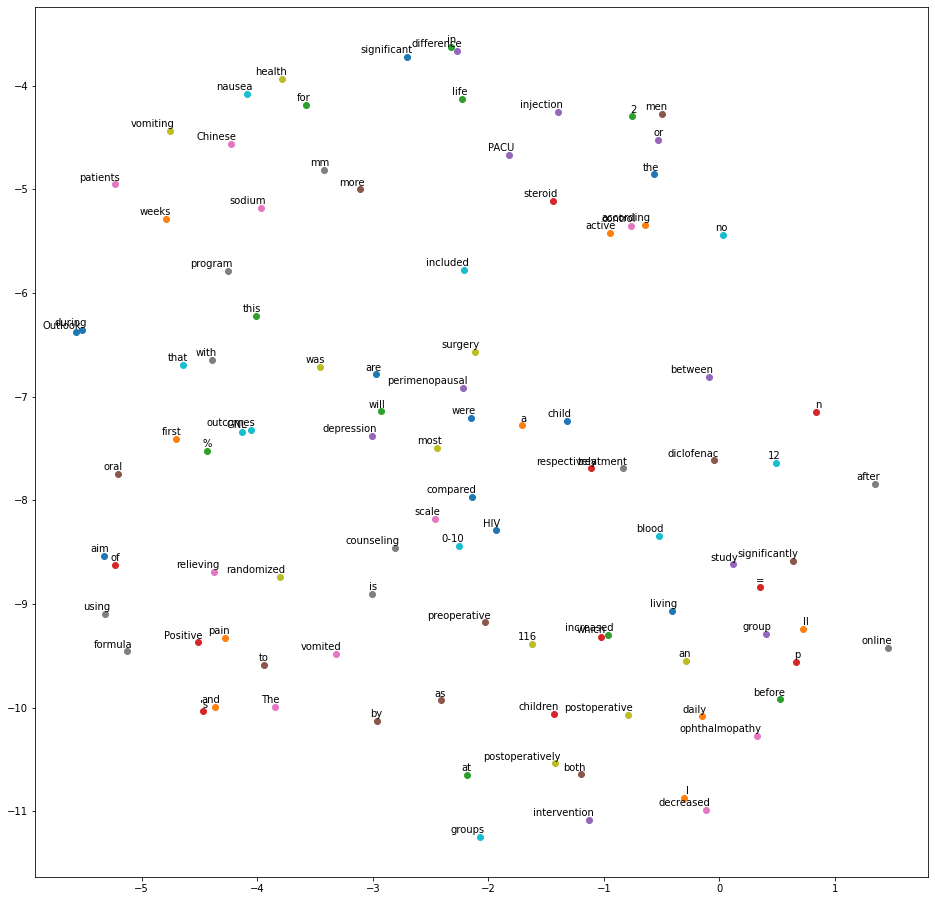

In [60]:
tsne_plot(model.wv, no_words=100)

In [61]:
#!python -m spacy download en_core_web_sm

In [62]:
# Trying NER

import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [63]:
#raw_text
raw_one =' '.join(raw_text)
#raw_one

In [64]:
raw_text = raw_one
text1= NER(raw_text)

In [65]:
for word in text1.ents:
    print(word.text,word.label_)

Positive Outlook ORG
Australia GPE
Positive Outlook ' The program WORK_OF_ART
daily DATE
Participants ORG
90 minutes TIME
seven weeks DATE
Secondary ORDINAL
Data ORG
eight weeks DATE
12 week DATE
Positive Outlook GPE
29 CARDINAL
two CARDINAL
15 CARDINAL
II CARDINAL
14 CARDINAL
Only 12 CARDINAL
16 female QUANTITY
8 CARDINAL
226 198 mm QUANTITY
186 0996 mm QUANTITY
23 186 mm QUANTITY
1908 116 mm QUANTITY
II CARDINAL
475 12 DATE
II CARDINAL
083 12 CARDINAL
6 months DATE
667 % PERCENT
333 % PERCENT
50 % and 75 % PERCENT
0 % PERCENT
0 % PERCENT
83 % and 83 % PERCENT
II CARDINAL
II Orbital PRODUCT
116 CARDINAL
58 CARDINAL
PACU PERSON
the first postoperative hour TIME
2 4 8 and 24h DATE
first ORDINAL
PACU ORG
0 CARDINAL
0 CARDINAL
PACU ORG
00002 DATE
8h CARDINAL
first ORDINAL
PACU ORG
Four hours TIME
60 % PERCENT
116 CARDINAL
More than half CARDINAL
the evening TIME
six CARDINAL
four CARDINAL
first ORDINAL
GNL ORG
Chinese NORP
Chinese NORP
Between September 2004 DATE
April 2008 DATE
47 DATE
C

In [66]:
displacy.render(text1,style="ent",jupyter=True)

In [67]:
import joblib
import re
import string

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB

In [68]:
categories = [
    "BACKGROUND",
    "OBJECTIVE",
    "METHODS",
    "RESULTS",
    "CONCLUSION",
]

test_data_sample = test_data.iloc[0:7000]
train_data_sample = train_data.iloc[0:3000]


group_data = train_data_sample




In [69]:
train_df = pd.DataFrame(
    dict(
        text= group_data["text"],
        target= group_data["category"]
    )
)


test_df = pd.DataFrame(
    dict(
        text= test_data_sample["text"],
        target= test_data_sample["category"]
    )
)

In [70]:
vec = CountVectorizer(
    ngram_range=(1, 3), 
    stop_words="english",
)

X_train = vec.fit_transform(train_df.text)
X_test = vec.transform(test_df.text)

y_train = train_df.target
y_test = test_df.target

In [71]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

  BACKGROUND       0.55      0.10      0.17       624
 CONCLUSIONS       0.56      0.40      0.47      1043
     METHODS       0.64      0.84      0.73      2311
   OBJECTIVE       0.68      0.18      0.28       550
     RESULTS       0.72      0.85      0.78      2472

    accuracy                           0.66      7000
   macro avg       0.63      0.48      0.49      7000
weighted avg       0.65      0.66      0.62      7000



In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(train_data_sample.text).toarray()
labels = train_data_sample.category
features.shape

(3000, 2284)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]


CV = 5


cv_df = pd.DataFrame(index=range(CV * len(models)))


entries = []


for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

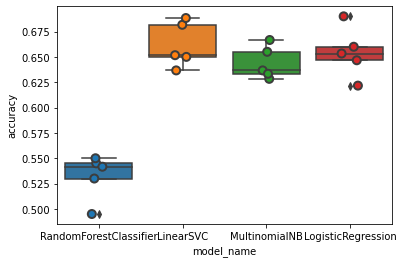

In [74]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [75]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.661667
LogisticRegression        0.654333
MultinomialNB             0.644000
RandomForestClassifier    0.532333
Name: accuracy, dtype: float64

In [76]:
model = LinearSVC()

X_train = vec.fit_transform(train_df.text)
X_test = vec.transform(test_df.text)

y_train = train_df.target
y_test = test_df.target


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  BACKGROUND       0.50      0.17      0.25       624
 CONCLUSIONS       0.55      0.44      0.49      1043
     METHODS       0.66      0.86      0.75      2311
   OBJECTIVE       0.70      0.39      0.50       550
     RESULTS       0.73      0.79      0.76      2472

    accuracy                           0.67      7000
   macro avg       0.63      0.53      0.55      7000
weighted avg       0.66      0.67      0.65      7000

